In [32]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler

In [33]:
import tensorflow as tf

In [34]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [35]:
data = pd.read_csv('Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [37]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [39]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [40]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [41]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [42]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [43]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 27s - loss: 0.0340 - 27s/epoch - 781ms/step
Epoch 2/20
35/35 - 8s - loss: 0.0128 - 8s/epoch - 217ms/step
Epoch 3/20
35/35 - 8s - loss: 0.0094 - 8s/epoch - 215ms/step
Epoch 4/20
35/35 - 8s - loss: 0.0098 - 8s/epoch - 218ms/step
Epoch 5/20
35/35 - 7s - loss: 0.0070 - 7s/epoch - 209ms/step
Epoch 6/20
35/35 - 7s - loss: 0.0109 - 7s/epoch - 211ms/step
Epoch 7/20
35/35 - 7s - loss: 0.0068 - 7s/epoch - 213ms/step
Epoch 8/20
35/35 - 7s - loss: 0.0074 - 7s/epoch - 213ms/step
Epoch 9/20
35/35 - 7s - loss: 0.0082 - 7s/epoch - 206ms/step
Epoch 10/20
35/35 - 7s - loss: 0.0056 - 7s/epoch - 210ms/step
Epoch 11/20
35/35 - 8s - loss: 0.0070 - 8s/epoch - 215ms/step
Epoch 12/20
35/35 - 7s - loss: 0.0054 - 7s/epoch - 206ms/step
Epoch 13/20
35/35 - 7s - loss: 0.0056 - 7s/epoch - 204ms/step
Epoch 14/20
35/35 - 7s - loss: 0.0054 - 7s/epoch - 209ms/step
Epoch 15/20
35/35 - 7s - loss: 0.0059 - 7s/epoch - 207ms/step
Epoch 16/20
35/35 - 7s - loss: 0.0053 - 7s/epoch - 201ms/step
Epoch 17/20
35/

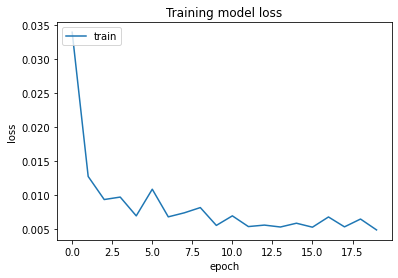

In [44]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [45]:
testData = pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [46]:
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 7s 70ms/step


array([[1.2222136],
       [1.2237784],
       [1.2332331],
       [1.2485727],
       [1.2625853],
       [1.2662426],
       [1.2585362],
       [1.2448834],
       [1.2344215],
       [1.2299052],
       [1.2227377],
       [1.211863 ],
       [1.2014245],
       [1.1913974],
       [1.1871767],
       [1.188906 ],
       [1.2026831],
       [1.2268158],
       [1.2565204],
       [1.287949 ],
       [1.3054473],
       [1.3091631],
       [1.2969707],
       [1.2743812],
       [1.2507273],
       [1.2339619],
       [1.2259248],
       [1.2213614],
       [1.2125655],
       [1.201071 ],
       [1.188579 ],
       [1.1746893],
       [1.1552483],
       [1.1313157],
       [1.1185712],
       [1.1225274],
       [1.1388986],
       [1.1605389],
       [1.1833342],
       [1.1981148],
       [1.2128462],
       [1.2294538],
       [1.2479615],
       [1.2656119],
       [1.278957 ],
       [1.2840612],
       [1.2788686],
       [1.2723187],
       [1.2694706],
       [1.2727853],


In [47]:
predicted_price = sc.inverse_transform(y_pred)

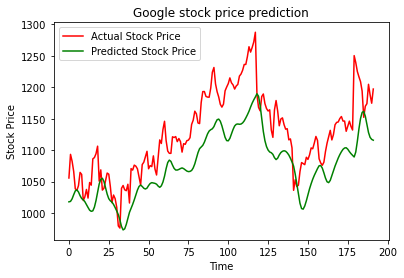

In [48]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()